In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json

In [115]:

url = 'https://api.graph.cool/simple/v1/cj9inyrks2ssl0130yiv567ps'

def run_query(query):
    response = requests.post(url, json={'query': query})
    if response.status_code == 200:
        return response.json()
    else:
        raise Exception('query failed to returning code of {}. {}'.format(requests.status_code, query))
        
query = """

{
    allListings {
        id
        latitude
        longitude
        description
        airConditioning
        furnished
        generator
        garden
        boysQuarter
        bedrooms
        bathrooms
        masterBedroom
        price
        parkingSpace
        outdoorToilet
        outdoorKitchen
        waterTank
        kitchen
        guestToilet
        swimmingPool
            locality {
      name
    }
    }
}

"""

result = run_query(query)
all_listing = result['data']['allListings']

In [126]:
locality = [item['locality'] for item in all_listing]

In [68]:
df = pd.DataFrame(all_listing)
df.head(5)

,airConditioning,bathrooms,bedrooms,boysQuarter,description,furnished,garden,generator,guestToilet,id,...,latitude,locality,longitude,masterBedroom,outdoorKitchen,outdoorToilet,parkingSpace,price,swimmingPool,waterTank
0,False,2,3,False,3 Bedroom family apartment,False,False,False,False,cj9r9f7tj43kb0146v1y0hpu8,...,13.400521,{u'name': u'Brusubi 1st Phase'},-16.731424,None,False,None,True,130000.0,False,False
1,False,3,3,True,Fully furnished apartment with 2 boys quarters...,True,True,False,True,cj9sol5i50xup016035eqkr82,...,13.398662,{u'name': u'Brusubi 1st Phase'},-16.732842,None,True,None,True,400000.0,False,False
2,False,5,4,False,4 Bedroom Family Home at Kerr Serign,False,False,False,False,cj9swdc7b62eo0160cs4xluez,...,NaN,{u'name': u'Senegambia'},NaN,None,False,None,True,4500000.0,False,False
3,False,5,4,True,Fully Furnished Story Building at Brufut,False,False,False,False,cj9swsow968mg0131kaw103ld,...,NaN,{u'name': u'Brufut'},NaN,None,False,None,False,7000000.0,True,False
4,False,2,3,True,Fully furnished family house with a boys quarter,True,False,False,False,cj9twpvt2zjxr0131obez74wf,...,13.386406,{u'name': u'Kerr Serign'},-16.754804,None,False,None,True,4500000.0,False,False


In [69]:
df.shape

(53, 21)

In [131]:
loc_df = pd.DataFrame(locality, index=np.arange(df.shape[0]))
loc_df.head(3)

,name
0,Brusubi 1st Phase
1,Brusubi 1st Phase
2,Senegambia


In [132]:
merged_df = pd.concat([df, loc_df], axis=1, join_axes=[df.index])
merged_df.head()

,airConditioning,bathrooms,bedrooms,boysQuarter,description,furnished,garden,generator,guestToilet,id,...,locality,longitude,masterBedroom,outdoorKitchen,outdoorToilet,parkingSpace,price,swimmingPool,waterTank,name
0,False,2,3,False,3 Bedroom family apartment,False,False,False,False,cj9r9f7tj43kb0146v1y0hpu8,...,{u'name': u'Brusubi 1st Phase'},-16.731424,None,False,None,True,130000.0,False,False,Brusubi 1st Phase
1,False,3,3,True,Fully furnished apartment with 2 boys quarters...,True,True,False,True,cj9sol5i50xup016035eqkr82,...,{u'name': u'Brusubi 1st Phase'},-16.732842,None,True,None,True,400000.0,False,False,Brusubi 1st Phase
2,False,5,4,False,4 Bedroom Family Home at Kerr Serign,False,False,False,False,cj9swdc7b62eo0160cs4xluez,...,{u'name': u'Senegambia'},NaN,None,False,None,True,4500000.0,False,False,Senegambia
3,False,5,4,True,Fully Furnished Story Building at Brufut,False,False,False,False,cj9swsow968mg0131kaw103ld,...,{u'name': u'Brufut'},NaN,None,False,None,False,7000000.0,True,False,Brufut
4,False,2,3,True,Fully furnished family house with a boys quarter,True,False,False,False,cj9twpvt2zjxr0131obez74wf,...,{u'name': u'Kerr Serign'},-16.754804,None,False,None,True,4500000.0,False,False,Kerr Serign


In [133]:
merged_df['name'].head()

0    Brusubi 1st Phase
1    Brusubi 1st Phase
2           Senegambia
3               Brufut
4          Kerr Serign
Name: name, dtype: object

In [5]:
print(df.isnull().sum())

airConditioning     0
bathrooms           0
bedrooms            0
boysQuarter         0
description         0
furnished           0
garden              0
generator           0
guestToilet         0
id                  0
kitchen             0
latitude           43
longitude          43
masterBedroom      10
outdoorKitchen      0
outdoorToilet      53
parkingSpace        0
price               0
swimmingPool        0
waterTank           0
dtype: int64


In [134]:
num_df = df[['airConditioning', 'bathrooms', 'bedrooms', 'boysQuarter', 'furnished', 'generator', 'guestToilet', 'kitchen', 'price', 'swimmingPool', 'waterTank', 'parkingSpace']]
num_df.head(5)

,airConditioning,bathrooms,bedrooms,boysQuarter,furnished,generator,guestToilet,kitchen,price,swimmingPool,waterTank,parkingSpace
0,False,2,3,False,False,False,False,True,130000.0,False,False,True
1,False,3,3,True,True,False,True,True,400000.0,False,False,True
2,False,5,4,False,False,False,False,True,4500000.0,False,False,True
3,False,5,4,True,False,False,False,True,7000000.0,True,False,False
4,False,2,3,True,True,False,False,True,4500000.0,False,False,True


In [135]:
num_df.fillna(0, inplace=True)
num_df.loc[num_df['airConditioning'] == False, 'airConditioning'] = 0
num_df.loc[num_df['airConditioning'] == True, 'airConditioning'] = 1
num_df.loc[num_df['boysQuarter'] == False, 'boysQuarter'] = 0
num_df.loc[num_df['boysQuarter'] == True, 'boysQuarter'] = 1
num_df.loc[num_df['furnished'] == False, 'furnished'] = 0
num_df.loc[num_df['furnished'] == True, 'furnished'] = 1
num_df.loc[num_df['generator'] == False, 'generator'] = 0
num_df.loc[num_df['generator'] == True, 'generator'] = 1
num_df.loc[num_df['guestToilet'] == False, 'guestToilet'] = 0
num_df.loc[num_df['guestToilet'] == True, 'guestToilet'] = 1
num_df.loc[num_df['kitchen'] == False, 'kitchen'] = 0
num_df.loc[num_df['kitchen'] == True, 'kitchen'] = 1
num_df.loc[num_df['swimmingPool'] == True, 'swimmingPool'] = 1
num_df.loc[num_df['swimmingPool'] == False, 'swimmingPool'] = 0
num_df.loc[num_df['waterTank'] == False, 'waterTank'] = 0
num_df.loc[num_df['waterTank'] == True, 'waterTank'] = 1
num_df.loc[num_df['parkingSpace'] == False, 'parkingSpace'] = 0
num_df.loc[num_df['parkingSpace'] == True, 'parkingSpace'] = 1

In [136]:
num_df.describe()

,airConditioning,bathrooms,bedrooms,boysQuarter,furnished,generator,guestToilet,kitchen,price,swimmingPool,waterTank,parkingSpace
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.0,5.300000e+01,53.000000,53.000000,53.000000
mean,0.056604,2.603774,3.075472,0.433962,0.566038,0.132075,0.169811,1.0,2.316145e+06,0.188679,0.226415,0.981132
std,0.233295,1.445678,1.579302,0.500363,0.500363,0.341813,0.379060,0.0,4.390092e+06,0.394998,0.422516,0.137361
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0,6.500000e+02,0.000000,0.000000,0.000000
25%,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.0,3.000000e+04,0.000000,0.000000,1.000000
50%,0.000000,2.000000,3.000000,0.000000,1.000000,0.000000,0.000000,1.0,2.750000e+05,0.000000,0.000000,1.000000
75%,0.000000,3.000000,4.000000,1.000000,1.000000,0.000000,0.000000,1.0,2.600000e+06,0.000000,0.000000,1.000000
max,1.000000,6.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.0,2.386846e+07,1.000000,1.000000,1.000000


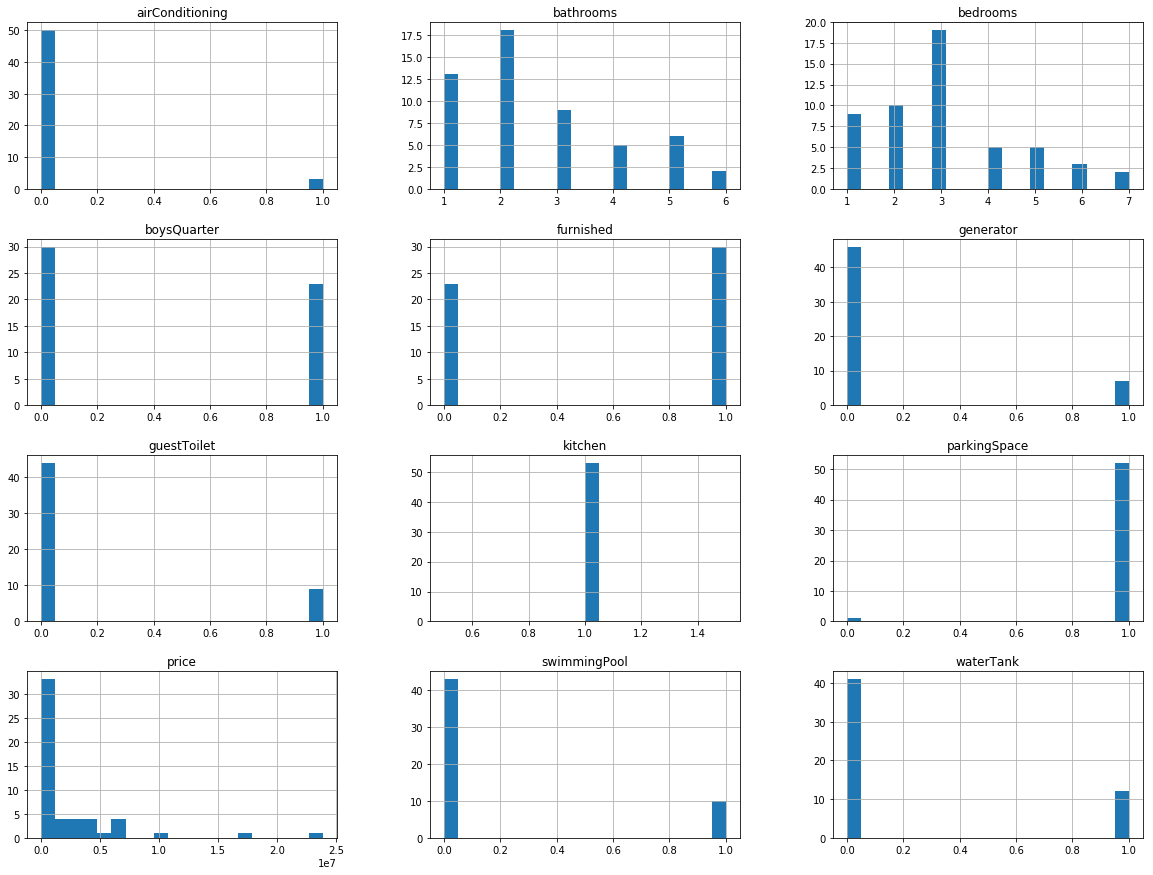

In [137]:
import matplotlib.pyplot as plt

num_df.hist(bins=20, figsize=(20,15))
plt.show()

In [138]:
#correlation matrix
corr_matrix = num_df.corr()
corr_matrix

,airConditioning,bathrooms,bedrooms,boysQuarter,furnished,generator,guestToilet,kitchen,price,swimmingPool,waterTank,parkingSpace
airConditioning,1.000000,-0.217317,-0.168401,0.115009,0.214476,0.145605,0.106679,NaN,-0.116357,0.299250,0.062578,0.033968
bathrooms,-0.217317,1.000000,0.847213,0.029595,-0.268862,0.107939,0.300606,NaN,0.413906,0.335497,-0.070689,-0.232055
bedrooms,-0.168401,0.847213,1.000000,-0.066579,-0.274123,0.123676,0.331539,NaN,0.421520,0.223353,-0.141379,-0.081958
boysQuarter,0.115009,0.029595,-0.066579,1.000000,0.305797,0.220638,0.212349,NaN,0.149590,0.356158,0.435940,-0.158378
furnished,0.214476,-0.268862,-0.274123,0.305797,1.000000,0.341565,0.091827,NaN,-0.084444,0.324948,0.382735,0.158378
generator,0.145605,0.107939,0.123676,0.220638,0.341565,1.000000,0.417264,NaN,0.354716,0.524050,0.721060,0.054096
guestToilet,0.106679,0.300606,0.331539,0.212349,0.091827,0.417264,1.000000,NaN,0.424193,0.295650,0.235615,0.062718
kitchen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,-0.116357,0.413906,0.421520,0.149590,-0.084444,0.354716,0.424193,NaN,1.000000,0.390945,0.198060,-0.149370
swimmingPool,0.299250,0.335497,0.223353,0.356158,0.324948,0.524050,0.295650,NaN,0.390945,1.000000,0.315247,-0.287563


In [139]:
num_df['airConditioning'].unique()

array([0, 1])

In [140]:
num_df.head()

,airConditioning,bathrooms,bedrooms,boysQuarter,furnished,generator,guestToilet,kitchen,price,swimmingPool,waterTank,parkingSpace
0,0,2,3,0,0,0,0,1,130000.0,0,0,1
1,0,3,3,1,1,0,1,1,400000.0,0,0,1
2,0,5,4,0,0,0,0,1,4500000.0,0,0,1
3,0,5,4,1,0,0,0,1,7000000.0,1,0,0
4,0,2,3,1,1,0,0,1,4500000.0,0,0,1


In [141]:
#normalizing data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
norm_data = scaler.fit_transform(num_df)
# scaler = preprocessing.StandardScaler()
# norm_data = scaler.fit_transform(num_df)

In [142]:
norm_data[0]

array([-0.24494897, -0.42163702, -0.04824532, -0.87559504, -1.14208048,
       -0.39009475, -0.45226702,  0.        , -0.50273788, -0.48224282,
       -0.54100178,  0.13867505])

In [160]:
# from sklearn.manifold import LocallyLinearEmbedding

# embedding = LocallyLinearEmbedding(n_components=2)
# embedded_data = embedding.fit_transform(norm_data)

In [161]:
from sklearn.metrics.pairwise import linear_kernel

nearest_neighbor = linear_kernel(norm_data, norm_data)

In [162]:
nearest_neighbor[0]

array([ 3.46505646, -2.13616327,  2.04565633, -2.26183011, -1.11118398,
        3.35675534, -0.1600796 ,  1.68050407,  2.39564849,  2.93939487,
        3.51063788, -1.81112135, -0.0282913 ,  2.18666327,  3.1910552 ,
        2.46306446,  3.17949397,  0.9193052 ,  1.17111374, -0.94730168,
       -0.94406453,  0.64891649,  3.04862542, -8.39660606, -6.55634529,
       -6.31726609, -8.88294866, -1.35950179,  1.53178923,  3.28650764,
        1.53177767, -0.18970416,  2.61336051,  0.49085843, -4.9725063 ,
       -0.2349179 , -1.52758926, -0.26579343, -1.85297861, -0.2349757 ,
       -1.52765863, -1.52765863,  1.12357796,  1.15550608,  1.68451631,
       -0.23827066, -2.12313357,  3.14323953,  1.18780942, -0.79358113,
        3.4598539 ,  1.93080479, -2.94002101])

In [163]:
df.index

Index([u'cj9r9f7tj43kb0146v1y0hpu8', u'cj9sol5i50xup016035eqkr82',
       u'cj9swdc7b62eo0160cs4xluez', u'cj9swsow968mg0131kaw103ld',
       u'cj9twpvt2zjxr0131obez74wf', u'cj9tykyly0auv01165fv08906',
       u'cj9u2b0id296k017516al1l1i', u'cj9u2lt0b296f0146dmey33nq',
       u'cj9wv0xot1hxj0175cy1sjzvd', u'cj9wvqwe43aoy0160j9nt03a5',
       u'cja9s342x14tm0195ft6yzg0z', u'cja9txi771vuz016406oso9rw',
       u'cjaa083w065e80103wbyk375p', u'cjaa289vs72jd0103emg6aclt',
       u'cjaa2ocp9777g01958abwnq8a', u'cjafej33pcgql0195akq2k6oy',
       u'cjamko1g7ywdx01653b3gkhoy', u'cjb2goynkeidz01244hvdngdb',
       u'cjb6ixwf1znw601246qi5mors', u'cjc96fksoizi90155fynvo93i',
       u'cjc972cm10uid018341e6jn9n', u'cjc98glcn1hxs0183voo7cb7i',
       u'cjc990ehckad40115cppoxnn8', u'cjcuoqmqr36um01767uq8qzrj',
       u'cjcuow7q3399m0124nilzr5og', u'cjcurlh2u4fcy0124andm4mq7',
       u'cjcw22skgkxz9012423onk6wk', u'cjdkfh42dgy9s0188azcffdcv',
       u'cjdn0hs4qm5d70117ps344yiq', u'cjdom172v650u0185hkg9n1

In [164]:
# df.set_index('id', inplace=True)

In [165]:
indices = pd.Series(df.index)

In [166]:
def recommend(id_, nearest_neighbor = nearest_neighbor):
    
    similar_listings_ids = []
    
    # getting the index of the hotel that matches the name
    idx = indices[indices == id_].index[0]
    
    #creating a Series with the similarity scores in descending order
    score_series = pd.Series(nearest_neighbor[idx]).sort_values(ascending=False)
    
    # getting the indexes of the 10 most similar listings except itself
    top_10_indexes = list(score_series.iloc[1:21].index)
    
    # population the list with the names of the top 10 matching hotels
    for i in top_10_indexes:
        similar_listings_ids.append(list(df['description'])[i])
        
    return similar_listings_ids
    


In [167]:
recommend('cj9r9f7tj43kb0146v1y0hpu8')

[u'3 Bedroom family apartment',
 u'Newly built 3 bedroom semi-detached bungalow',
 u'Nice family house apartment with nice garden, generator room',
 u'Semi-detached bungalow with 3 bedrooms including one master bedroom + En-suit. The Property has a building area of 70m2 and a plot size of 230m2 - 260m2',
 u'Beautiful family home with 3 bedroom,2 bathrooms and parking space.',
 u'Beautiful family complex with 3 bedrooms',
 u'A full and spacious  apartment with 4 bedrooms and 3 bathrooms.',
 u'Large family house with a built up area of 126(m2)',
 u'Double storey family complex with a built up area of 169(m2)',
 u'Beautiful family complex. The story building also features an outdoor garden.',
 u'Stunning villa with 3 bedrooms, 3 bathrooms, beautiful garden and a fully fitted kitchen with European counters and cabinet',
 u'Double storey family complex with a built up area of  266(m2)',
 u'Large family complex apartment with 6 master bedrooms',
 u'4 Bedroom Family Home at Kerr Serign',
 u'3

In [ ]:
import pickle
pickled_data = pickle.dump(nearest_neighbor, open('model101.pkl', 'wb'))

In [ ]:
df.to_pickle('deka_data.pkl')

In [ ]:
import requests, json

url = 'https://mikel189.pythonanywhere.com/'
query = 'cj9swdc7b62eo0160cs4xluez'

response = requests.post(url, json=query)
print(response.status_code)

In [ ]:
nn = pickle.load(open('model101.pkl', 'rb'))
nn[0]